In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", as_frame=False)

C:\Users\sumit\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
X=mnist.data
y=mnist.target

In [5]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
X.shape

(70000, 784)

In [7]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
y.shape

(70000,)

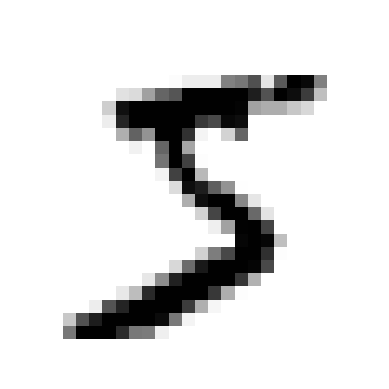

In [9]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [10]:
y[0]

'5'

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [12]:
#train a binary classifier
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [13]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [14]:
sgd_clf.predict([some_digit])

array([ True])

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96763134, 0.95996571, 0.96601624])

In [16]:
from sklearn.dummy import DummyClassifier
dummy_clf = SGDClassifier(random_state=42)
dummy_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [17]:
sgd_clf.predict(X_train)

array([False, False, False, ..., False, False, False])

In [18]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96763134, 0.95996571, 0.96601624])

In [19]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53310,   847],
       [ 1263,  4080]], dtype=int64)

In [21]:
y_train_perfect_predictions = y_train_5 #act like as we are perfect
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54157,     0],
       [    0,  5343]], dtype=int64)

In [22]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8280901156890603

In [23]:
recall_score(y_train_5, y_train_pred)

0.7636159460976979

In [24]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7945472249269717

In [25]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([3156.6703652])

In [26]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [27]:
threshold = 4000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [28]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")

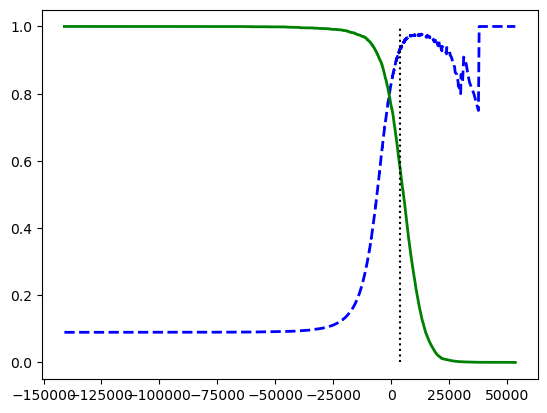

In [29]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
plt.plot(thresholds, precisions[:-1], "b--", label="precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.show()

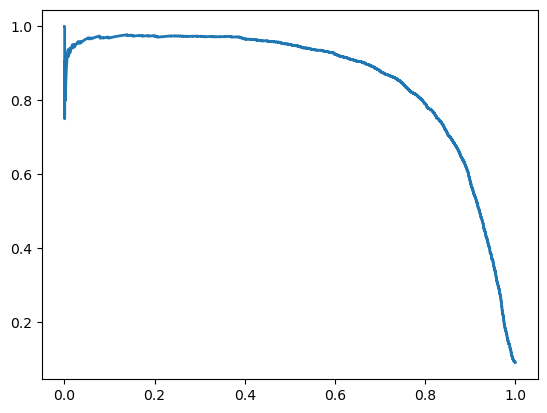

In [30]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.show()

In [31]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

2242.221693870275

In [32]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9001261034047919

In [33]:
recall_score(y_train_5, y_train_pred_90)

0.6679767920643833

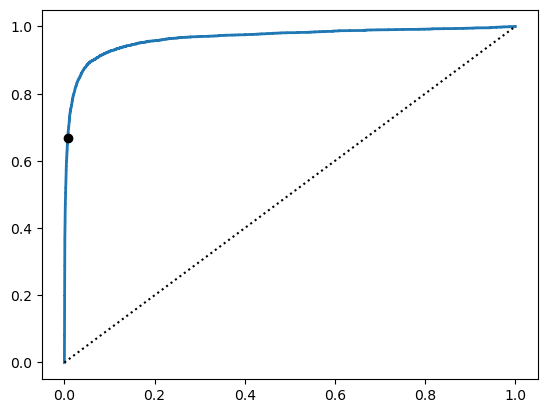

In [34]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
idx_for_threshold_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90 = tpr[idx_for_threshold_90]
fpr_90 = fpr[idx_for_threshold_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0,1], [0,1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.show()

In [35]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9655057380239735

In [36]:
#compare with random forest classifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_proba_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [37]:
y_proba_forest[:3]

array([[0.27, 0.73],
       [0.94, 0.06],
       [0.95, 0.05]])

In [38]:
y_scores_forest = y_proba_forest[:,1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

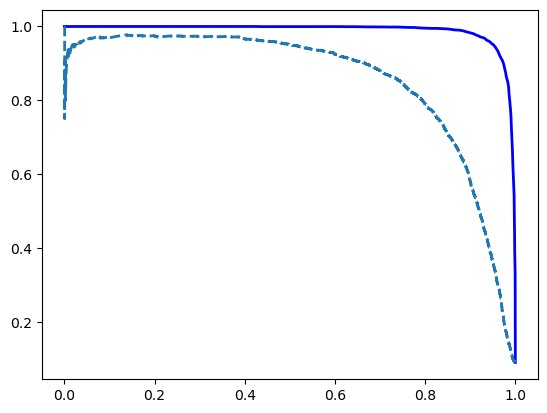

In [39]:
plt.plot(recalls_forest, precisions_forest, "b-", label="Random Forest", linewidth=2)
plt.plot(recalls, precisions, "--", label="SGD", linewidth=2)
plt.show()

In [40]:
y_train_pred_forest = y_proba_forest[:,1] >= 0.5
f1_score(y_train_5, y_train_pred_forest)

0.9260514251544748

In [41]:
roc_auc_score(y_train_5, y_scores_forest)

0.9984737275326855